In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')


<IPython.core.display.Javascript object>

# Unsupervised Machine Learning  and Clustering


<h2 id="tocheading">Table of Contents</h2>
<div id="toc"></div>


The story so far:

- Linear Discriminant Analysis (LDA) and Fisher's linear discriminant
- Principal Component Analysis (PCA)
- Feature Selection


Notations:

* Uppercase letters such as $X$ or $Y$ denote generic aspects of a variable (i.e. the actual random variable)
* Observed values are written in lowercase. The ith observed value of $X$ is written as $x_i$
* Matrices are written in bold uppercase letters as in $\mathbf{X}$
* Observations map as *rows* in the matrix while the observed variables are the *columns*.

So if I measure two observables $p = 2$ the size and weight of $N = 100$ people, I get a $N \times p$ matrix $\mathbf{X}$.
One observation in that matrix is denoted as $x_i = [ size, weight ]$ while all observations of the variable size are denoted by $\mathbf{x}_j$ 


So far we have been occupied with 
predicting the values of one or more outputs or response variables $Y = (Y_1, \ldots, Y_m)$ for a given set of input or predictor variables $X = (X_1, \ldots , X_p)$. 

One possible definition of supervised machine learning

> Given a $N \times p$ matrix $\mathbf{X}$ and some associated output vector $\mathbf{Y} \in \mathbb{R}^N$,
 find a function $f(X) = \hat{Y}$ that takes a vector $X \in \mathbb{R}^p$ and returns a prediction for $\hat{Y}$
 where some "loss function" $L(Y, f(X))$ is minimized for all $X$.
 
We've tried to split points into different classes by finding a decision function which seperates the points in an "optimal" way. This process is often called __classification__

In __regression__ the dependent variable is not discrete but a continous value. The problem remains similar however. From *known* input data we try to find a function which accurately predicts $Y \in \mathbb{R}$.

In __unsupervised__ machine learning problems the output vector $\mathbf{y}$ is *unknown*.

In [2]:
%matplotlib inline
from ml import plots
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
pd.options.display.max_rows = 10

discrete_cmap = LinearSegmentedColormap.from_list('discrete', colors = [(0.8, 0.2, 0.3), (0.98, 0.6, 0.02), (0.1, 0.8, 0.3), (0, 0.4, 0.8), ], N=4)

plots.set_plot_style()

/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


## Classification Example (Iris)

The sterotypical machine learning data set. Given some measurements from flower petals is it possible to deduce the species for a new sample of measurements?

Originally published in 1936 by Ronald Fisher in his paper about LDA. 

<table style="width:100%">
  <tr>
    <td><img src="./ml/images/setosa.jpg" alt="Drawing" style="width: 200px;"/></td>
    <td><img src="./ml/images/versicolor.jpg" alt="Drawing" style="width: 200px;"/></td> 
    <td><img src="./ml/images/virginica.jpg" alt="Drawing" style="width: 200px;"/></td>
  </tr>
</table>

<p style="color:gray"> Iris flower data set. (2017, October 24). In Wikipedia, The Free Encyclopedia.  <p>

Length and width of the petals and sepals making the dataset four dimensional.  Measurements where taken in Canada by Botanist Edgar Anderson:

> all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus

The label vector $\mathbf{y}$ is known because the botanist categorized the flowers into species.

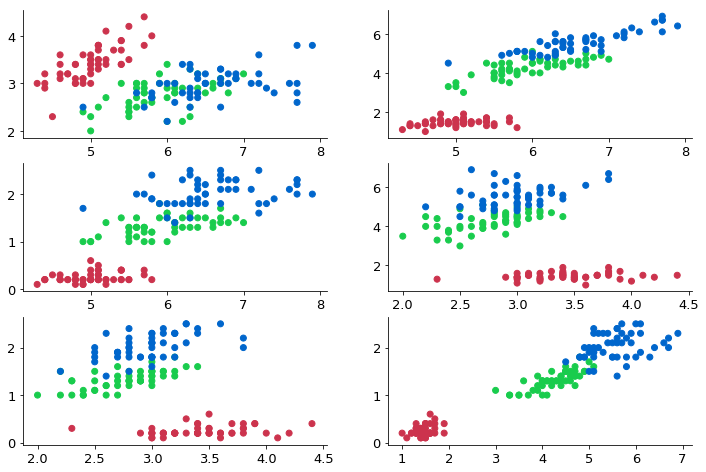

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data  # we only take the first two features.
y = iris.target

f, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2)
ax1.scatter(X[:, 0], X[:, 1], c=y, cmap=discrete_cmap, label='species')
ax2.scatter(X[:, 0], X[:, 2], c=y, cmap=discrete_cmap)
ax3.scatter(X[:, 0], X[:, 3], c=y, cmap=discrete_cmap)
ax4.scatter(X[:, 1], X[:, 2], c=y, cmap=discrete_cmap)
ax5.scatter(X[:, 1], X[:, 3], c=y, cmap=discrete_cmap)
ax6.scatter(X[:, 2], X[:, 3], c=y, cmap=discrete_cmap)

The question this data set can help us answer is:

> What species does this flower likely belong to.

## Unsupervised Learning

In unsupervised learning we have no given $Y$.

These methods try to find the underlying (joint) probability density $Pr(X)$ so that we might learn some properties about it.

One common question is whether $X$ is created by a mixture of two or more underlying random variables.

In simpler terms:

 - Given some points, can we infer something about the underlying distributions or labels


### Clustering

Clustering algorithms try to find modes of $Pr(X)$ based on densities, neighbourhood relations or any other measure of 'similarity'  between points.

More generally speaking to quote wikipedia again:

>Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters).


In the example below an unknown number of gaussian distributions are sampled to create a scatter plot.

Can one infer $Pr(X)$ by looking at $X$, i.e. the blue dots?

In this case we know that this distribution of blue dots, $X$, was created by sampling $k$ two dimensional gaussians with known standard deviation.
This is just what 

    X, y = make_blobs(n_samples=300, centers=k, center_box=(-2, 2), cluster_std=0.5)
 
does.
We even know in what region of space we have to look for to find the centroids centroids of these blobs. 

Questions: 

   - How many blobs do we have?
   - Which points belong to which?

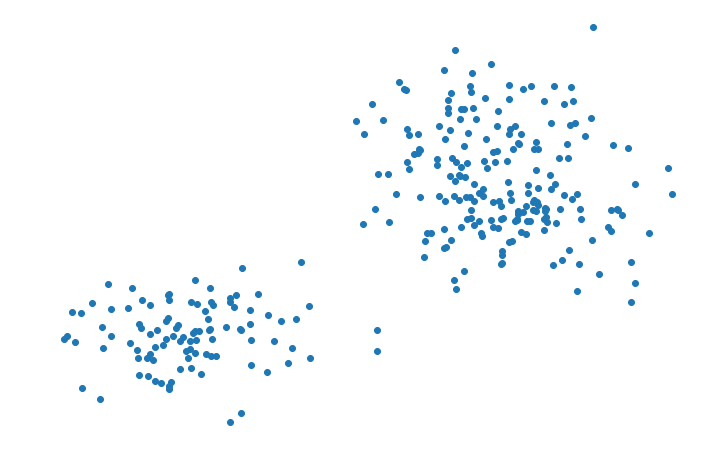

In [4]:
np.random.seed(1234)
from sklearn.datasets import make_blobs

# choose a random number between 1 and 3
k = np.random.randint(1, 4)

# create k blobs 
X, y = make_blobs(n_samples=300, centers=k, center_box=(-2, 2), cluster_std=0.5)

# plot points without any color coding.
plt.scatter(X[:, 0], X[:, 1])
plt.axis('off')
None

If you guessed k=2, you're wrong.

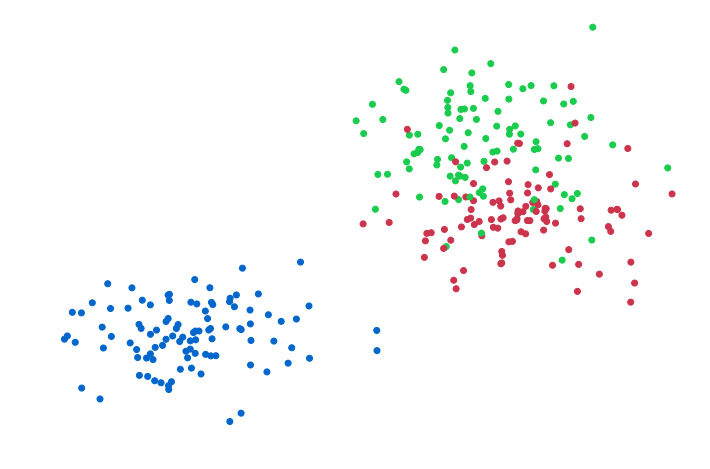

In [5]:
#plot the same points this time with color coding 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=discrete_cmap)
plt.axis('off')
None

### K-Means Algorithm

The k-Means algorithm tries to find a partition of the data into $k$ clusters $S = \{S_1, \ldots, S_k\}$  which minimize the variance within those clusters. The number of clusters $k$ has to specified by the user.

Formally speaking the algorithm solves
$$
{\underset {S}{\operatorname {arg\,min} }}\sum _{S_i \in S}\sum _{x \in S_{i}}\left\|x -{\overline{x}}_{S_i}\right\|^{2}.
$$


This problem is similar in nature to that of feature selection. A minimization over all possible subsets of the points $S$. Solving the general optimization problem is NP-Hard and therefore intractable. 

In simpler terms, it would take too long to find the optimal solution in the general case. 
Again there is a popular greedy heuristic which is usualy used to solve the problem.

#### Loyds Algorithm

Loyds Algorithm (sometimes also simply called *the* k-means algorithm) finds a local optimum using a greedy heuristic.

It does so iterativly according to the following steps 

1. Pick some initial cluster means (or centroids) $\{m_1, \ldots, m_k \}$ either randomly or according to some heuristic.

2. Create a partition $S$  by assigning each point $x \in X$ to the cluster $S_i$ where the distance to $m_i$ is the smallest.

3. Update the cluster means by calculating the means within the assigned clusters. 

4. Repeat steps 2 and 3 until convergence.

One popular convergence is the total change in cluster centroids per iteration. If the cluster centroids do not change from one iteration to the next, return the cluster centroids.


The example below shows a k-mean clustering on $k=3$ random blobs.


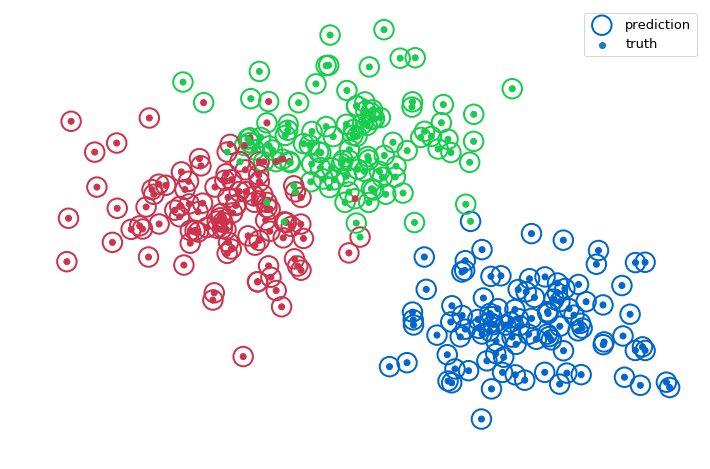

In [6]:
np.random.seed(1234)
from sklearn.cluster import KMeans

# create three random blobs
X, y = make_blobs(n_samples=300, centers=3, center_box=(-2, 2), cluster_std=0.5)

# use KMeans to predict clusters for each sample in X
prediction = KMeans(n_clusters=3).fit_predict(X)

# shift labels to get the right colors
prediction = np.choose(prediction, [3, 0, 2])

# plot rings with predicted clusters
plt.scatter(X[:, 0], X[:, 1], facecolor='', edgecolors=discrete_cmap(prediction), lw=2,  s=380, label='prediction')

# plot points with true cluster associations
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=discrete_cmap, label='truth')
plt.legend(loc='upper right')
plt.axis('off')
None

Below you can see an animation of k-Means as it converges. The black hexagons indicate the cluster centroids in the corresponding iteration. 

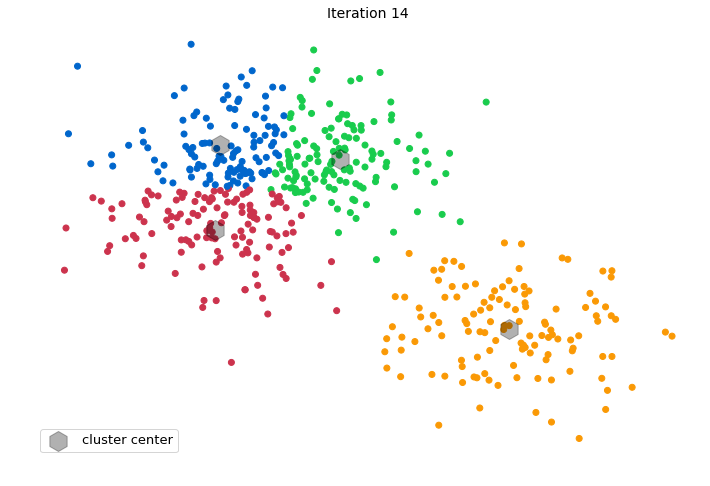

In [7]:
from IPython import display

# create 4 clsuters
k = 4

# choose inital cluster centers
X, y = make_blobs(n_samples=500, centers=k, center_box=(-2, 2), cluster_std=.5, random_state=1234)

fig = plt.figure()
ax = fig.add_subplot(111)

init_centers = np.array([[0, 0], [1, 1], [1, 2], [1, 3]])

# loop over each iteration. do it 5 times
for i in np.tile(range(1, 15), 5):
    kmeans = KMeans(n_clusters=4, init=init_centers, max_iter=i).fit(X)
    
    ax.cla()
    ax.set_title('Iteration {}'.format(i))
    
    ax.scatter(X[:,0], X[:,1],c=kmeans.labels_, cmap=discrete_cmap)
    ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', marker='h', s=400, alpha=0.3,  label='cluster center')
    
    ax.legend(loc=3)
    ax.axis('off')
    
    display.clear_output(wait=True)
    display.display(plt.gcf())

plt.close()
    

If the number of clusters in the center is not known, the algorithm does not produce meaningful results.
This is a serious limitation as the number of clusters in the data is rarely known.  


In the example below we sample two uniform 2D distributions and use k-means to cluster them into $k=4$ regions.


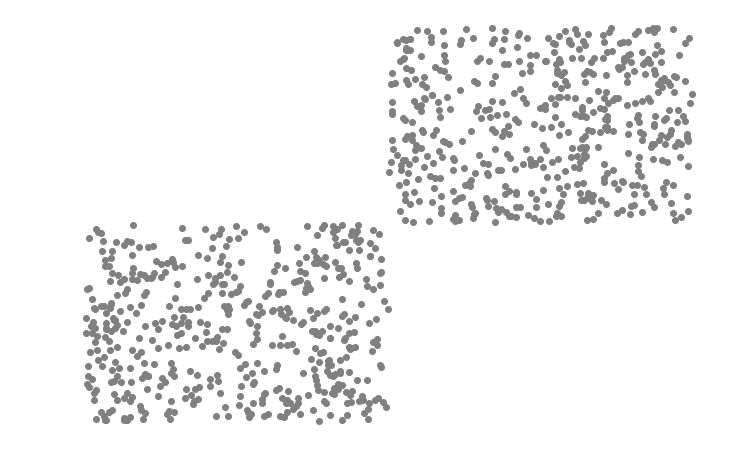

In [8]:
u1 = np.random.uniform(-1, 0, size=(500, 2))
u2 = np.random.uniform(0, 1, size=(500, 2))
X = np.append(u1, u2, axis=0)
plt.scatter(X[:, 0], X[:, 1], color='gray')
plt.axis('off')
None

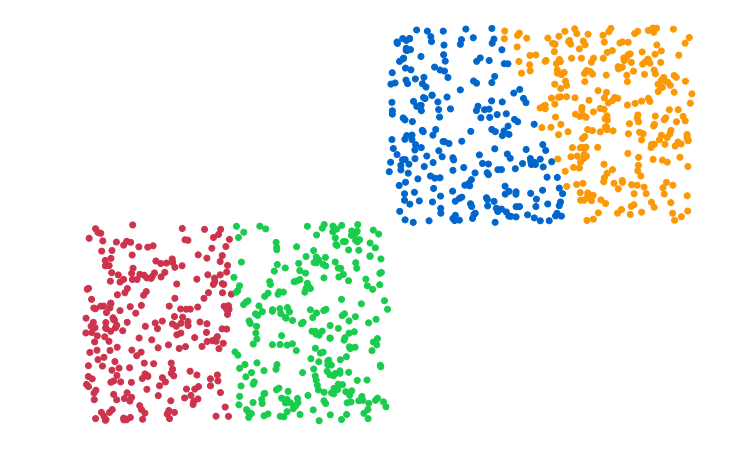

In [9]:
# use KMeans to predict clusters for each sample in X using the deliberatley wrong value of k=4
prediction = KMeans(n_clusters=4).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=prediction, cmap=discrete_cmap)
plt.axis('off')
None

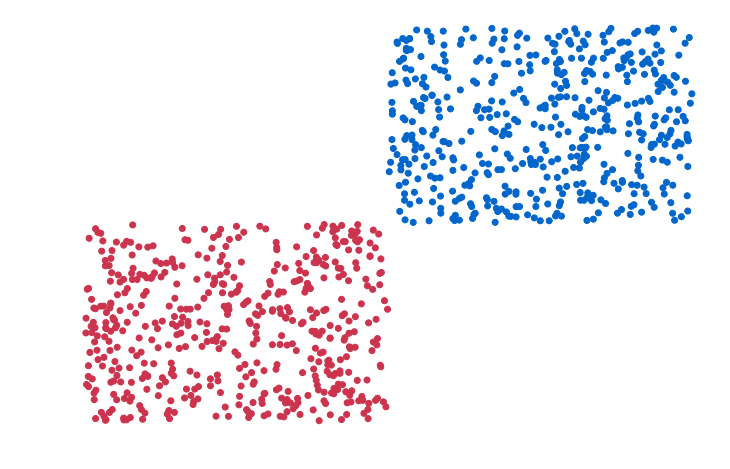

In [10]:
# use KMeans to predict clusters for each sample in X this time using the correct value for k=2
prediction = KMeans(n_clusters=2).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=prediction, cmap=discrete_cmap)
plt.axis('off')
None

The k-Means algorithm works well on convex clusters with similar standard deviations. But it fails on elongated or concave shapes.

Like all cluster algorithms k-Means has a number of advantages and disadvantages

Pros:

 - Relatively fast
 - Predictable results when inital cluster centroids are fixed.
 - works well on convex and 'blob' like shapes

Cons:

 - Number of clusters has to be known beforehand
 - Gets worse and slower in high dimensions
 
The follwing snippet transforms two random blobs to be elongated along the x axis.
In this case k-Means fails as the neighborhood relation does not yield meaningful results.

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


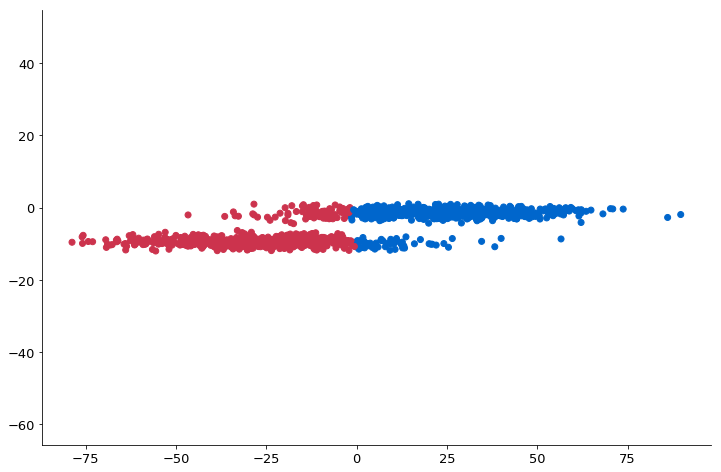

In [11]:
X, y = make_blobs(n_samples=1300, centers=2, random_state=2)
transformation = [[20, 0], [0, 1]]
X = np.dot(X, transformation)
prediction = KMeans(n_clusters=2,).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=prediction, cmap=discrete_cmap)
plt.axes().set_aspect('equal', 'datalim')
None

### Data Scaling

k-Means and many other algorithms, especially the ones using kernel functions, are sensitive to data scaling and centering.

The scikit-learn toolkit includes a  preprocessing module with  methods to scale and transform data.

##### Standard Scaling

The simplest scaler is the `StandardScaler` scaling data to unit variance and zero mean. It makes it 'gaussian like'.

##### MinMax Scaling

Forces the values of each attribute in the data to be within the given feature range. When transforming  to values between 0 and 1 the applied transformation is

$$
\mathbf{x}_j^{\prime} = \frac{(\mathbf{x}_j - \min(\mathbf{x}_j))}{(\max(\mathbf{x}_j) - \min(\mathbf{x}_j))}
$$


##### Quantile Scaling

Transform the given data to follow a normal, uniform or any other distribution with a CDF that can be inverted.
Use inverse transform sampling to transform the data. I.e. apply the inverse CDF to each column in the data.

https://en.wikipedia.org/wiki/Inverse_transform_sampling


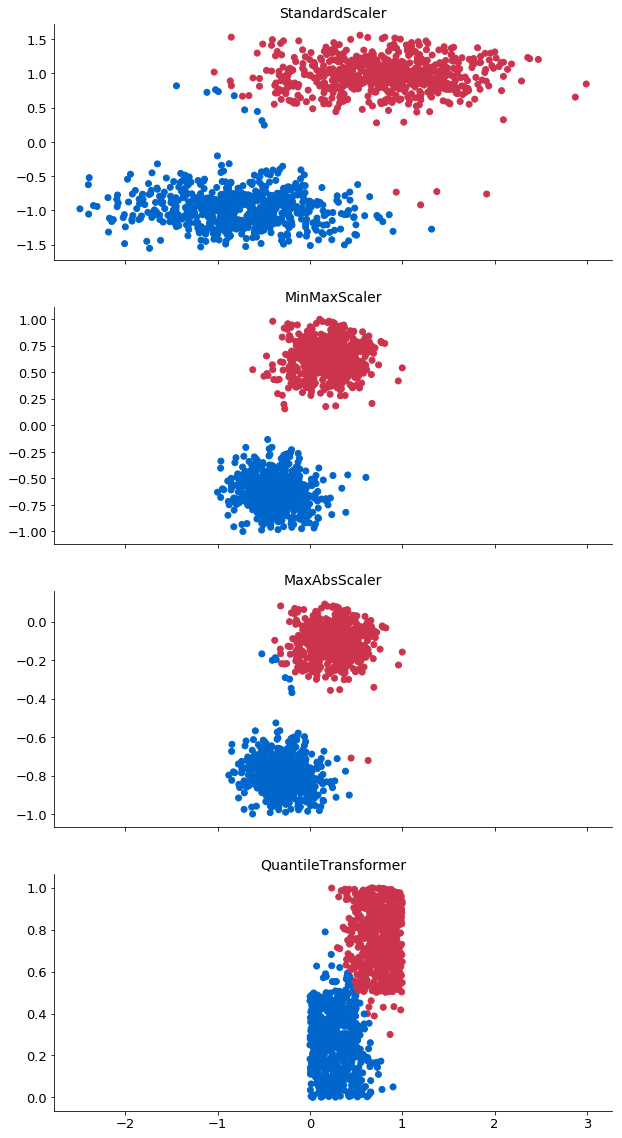

In [12]:
from sklearn import preprocessing

f, axs = plt.subplots(4, 1, figsize=(10, 20), sharex=True)

scalers=[
        preprocessing.StandardScaler(),
        preprocessing.MinMaxScaler(feature_range=(-1, 1)),
        preprocessing.MaxAbsScaler(),
        preprocessing.QuantileTransformer()
]

for scaler, ax in zip(scalers, axs):
    X_prime = scaler.fit_transform(X)
    prediction = KMeans(n_clusters=2, random_state=0).fit_predict(X_prime)
    ax.set_title(scaler.__class__.__name__)
    ax.scatter(X_prime[:, 0], X_prime[:, 1], c=prediction, cmap=discrete_cmap)
    
None

### Image Compression Using k-Means

For a typical color, or RGB,  image the value for each color component must be stored. It is basically a list of color vectors 

$$
c_i = \begin{pmatrix} R, G, B \end{pmatrix}
$$

For a $420 \times 640$ pixel image that results in  $420 \cdot 640 \cdot 3 \cdot 2  \; \text{byte} = 1.6128 \;  \text{megabyte}$ of memory.
This is how a typical Bitmap Image works.

The GIF format allows the compression of color information.  

In the example below we use k-Means to compress the color information of an image. We cluster the space of color components (either RGB, HSV or similar) into $k$ cluster centroids. 
Then only the association of each pixel to the cluster centroids and the centroids themselves have to be stored. 

When clustering the colors of an image into $k=50$ centroids for example  we only need to store $(420 \cdot 640 + k) \cdot 2  \; \text{byte} = 537.7 \; \text{kilobyte}$




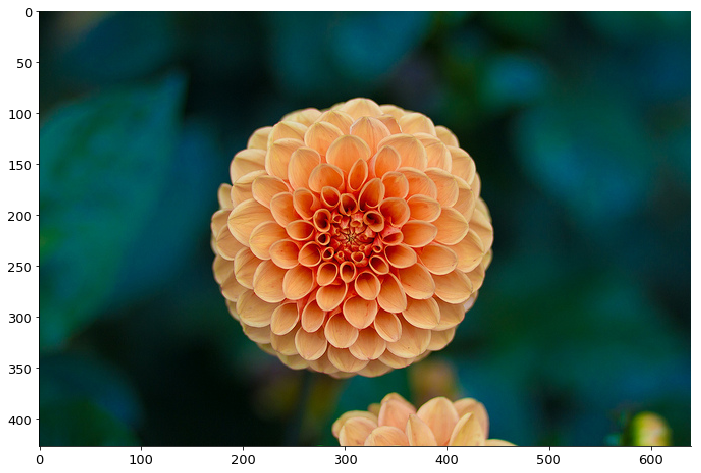

In [13]:
from sklearn.datasets import load_sample_image
from skimage import color

#load an example image as a 3D array
image = load_sample_image("flower.jpg")
image = np.array(image, dtype=np.float64) / 255

#store width length and number of colors
width, length, d = image.shape  

# show image
plt.imshow(image)

#convert image to hsv for nicer plots
image_hsv = color.rgb2hsv(image)

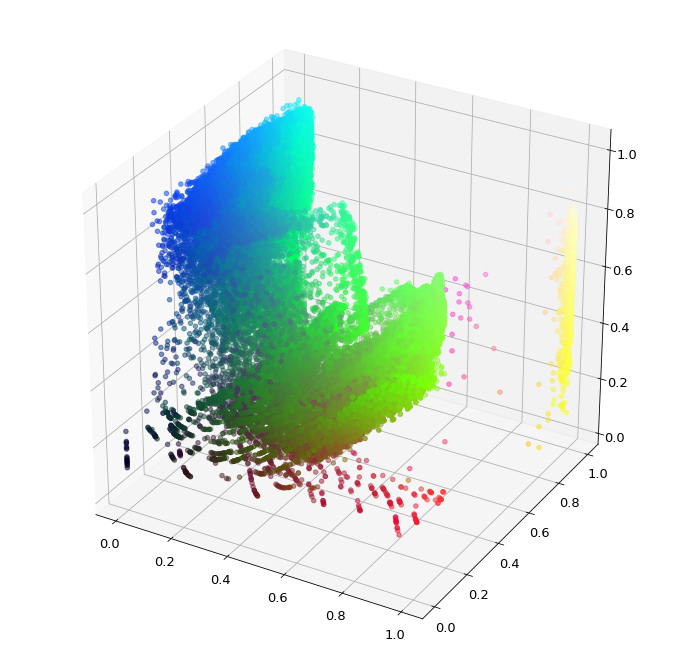

In [14]:
from mpl_toolkits import mplot3d

# plot H, V and S values of each pixel into a 3D coordinate system.

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter3D(image_hsv[:, :, 0], image_hsv[:, :, 1], image_hsv[:, :, 2], c=image_hsv.reshape(-1, 3), alpha=0.5)
None

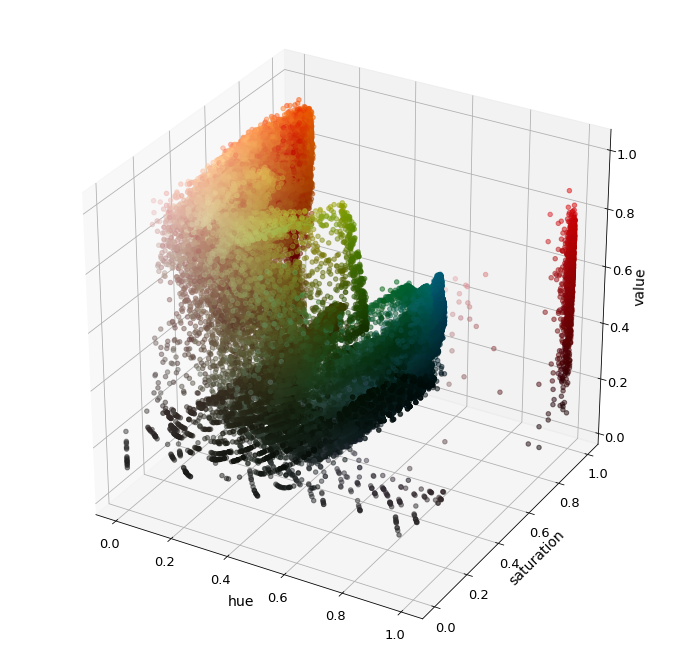

In [15]:
# same plot in HSV colorpsace
rgb = color.hsv2rgb(image_hsv).reshape(-1, 3)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter3D(image_hsv[:, :, 0], image_hsv[:, :, 1], image_hsv[:, :, 2], c=rgb, alpha=0.5)
ax.set_xlabel('hue')
ax.set_ylabel('saturation')
ax.set_zlabel('value')
None

In [16]:
from sklearn.utils import resample

# perform k-means on a small random sample of pixels
# we could use all pixels here but it would take much too long.
# we reshape the image into a 2D array for resampling and k-means fitting
flattened_image = image_hsv.reshape(-1, 3)
sample = resample(flattened_image, n_samples=1000, replace=False)

# get the desired number of cluster centers
kmeans = KMeans(n_clusters = 50).fit(sample)
centroids = kmeans.cluster_centers_

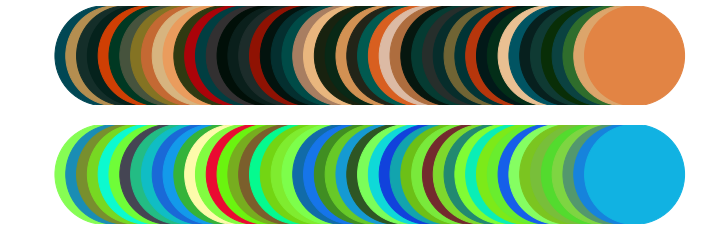

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4))

rgb = color.hsv2rgb(centroids.reshape(1, -1, 3)).reshape(-1, 3)

ax1.scatter(np.linspace(0, 1, len(rgb)), np.ones(len(rgb)),  c=rgb, s=10000)
ax1.axis('off')

ax2.scatter(np.linspace(0, 1, len(rgb)), np.ones(len(rgb)),  c=centroids, s=10000)
ax2.axis('off')
None

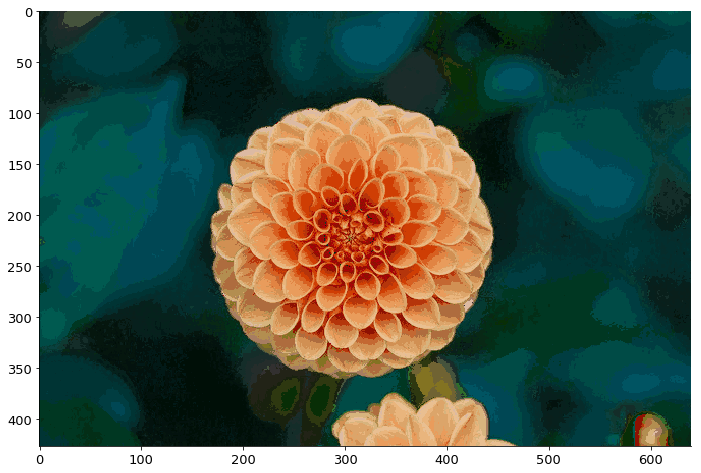

In [18]:
# associate each pixel with the number of a cluster (i.e. the nearest centroid/color)
labels = kmeans.predict(flattened_image)

# get the actual value for each cluster centroid and reshape into a 3D image
reconstructed  = centroids[labels].reshape(width, length, d)

# convert to RGB and plot again.
plt.imshow(color.hsv2rgb(reconstructed))

### Sorting colors using PCA

When plotting the image centroids there are various ways to arrange the colors. There is no natural order 
to colors. Just as there is no natural order to most things with more than 1 dimension. 

We can try a few different things and try to get a nice output.

1. Order by hue, Value, Saturation in HSV colorspace
2. Order by red, green, blue in RGB colorspace
3. Order by *length* of vector in e.g. eucledian norm 

In [19]:
flattened_image = image_hsv.reshape(-1, 3)
sample = resample(flattened_image, n_samples=1000, replace=False)

# get the desired number of cluster centers
kmeans = KMeans(n_clusters = 100).fit(sample)

hsv = kmeans.cluster_centers_
rgb = color.hsv2rgb(centroids.reshape(1, -1, 3)).reshape(-1, 3)


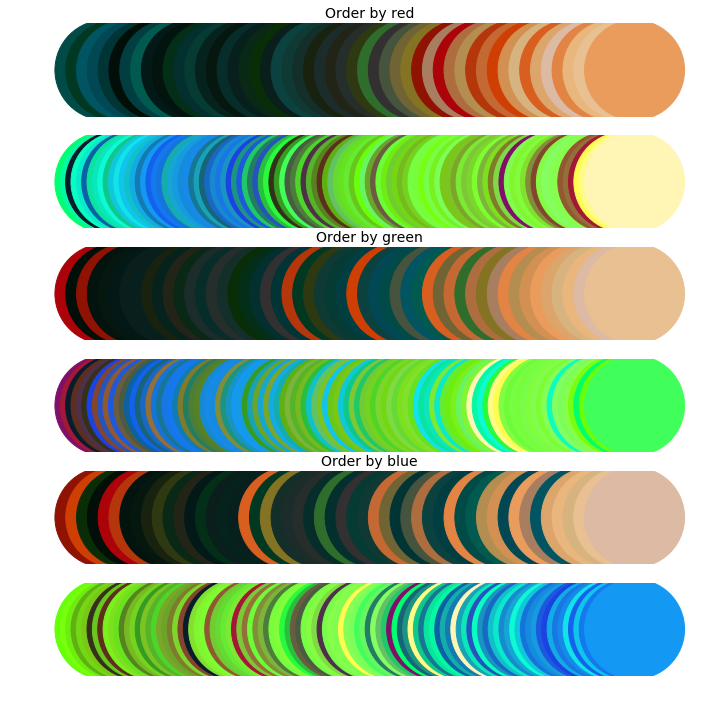

In [20]:

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(12, 12))

idx = np.argsort(rgb[:, 0])
ax1.scatter(np.linspace(0, 1, len(idx)), np.ones_like(idx),  c=rgb[idx], s=10000)
ax1.axis('off')
ax1.set_title('Order by red')
idx = np.argsort(hsv[:, 0])
ax2.scatter(np.linspace(0, 1, len(idx)), np.ones_like(idx),  c=hsv[idx], s=10000)
ax2.axis('off')

idx = np.argsort(rgb[:, 1])
ax3.scatter(np.linspace(0, 1, len(idx)), np.ones_like(idx),  c=rgb[idx], s=10000)
ax3.axis('off')
ax3.set_title('Order by green')
idx = np.argsort(hsv[:, 1])
ax4.scatter(np.linspace(0, 1, len(idx)), np.ones_like(idx),  c=hsv[idx], s=10000)
ax4.axis('off')


idx = np.argsort(rgb[:, 2])
ax5.scatter(np.linspace(0, 1, len(idx)), np.ones_like(idx),  c=rgb[idx], s=10000)
ax5.axis('off')
ax5.set_title('Order by blue')
idx = np.argsort(hsv[:, 2])
ax6.scatter(np.linspace(0, 1, len(idx)), np.ones_like(idx),  c=hsv[idx], s=10000)
ax6.axis('off')
None

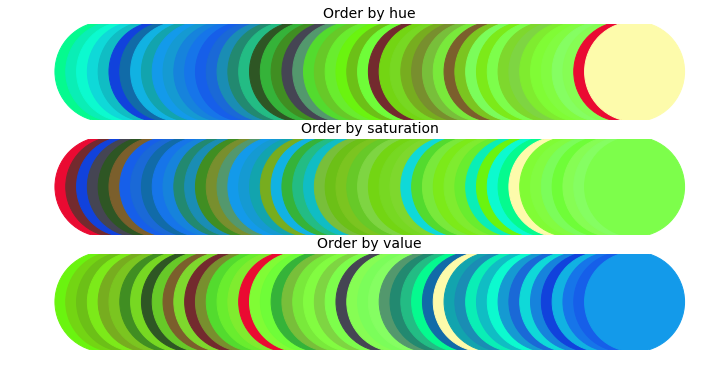

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 6))

idx = np.argsort(centroids[:, 0])
ax1.scatter(np.linspace(0, 1, len(idx)), np.ones_like(idx),  c=centroids[idx], s=10000)
ax1.axis('off')
ax1.set_title('Order by hue')

idx = np.argsort(centroids[:, 1])
ax2.scatter(np.linspace(0, 1, len(idx)), np.ones_like(idx),  c=centroids[idx], s=10000)
ax2.axis('off')
ax2.set_title('Order by saturation')


idx = np.argsort(centroids[:, 2])
ax3.scatter(np.linspace(0, 1, len(idx)), np.ones_like(idx),  c=centroids[idx], s=10000)
ax3.axis('off')
ax3.set_title('Order by value')

None

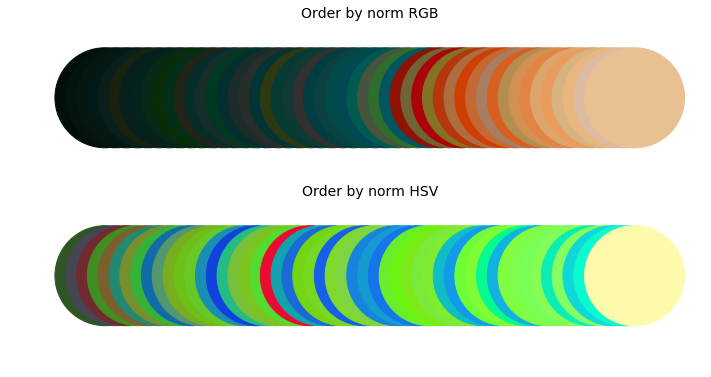

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

norm = np.sqrt(np.sum(rgb**2, axis=1))
idx = np.argsort(norm)

ax1.scatter(np.linspace(0, 1, len(idx)), np.ones_like(idx),  c=rgb[idx], s=10000)
ax1.axis('off')
ax1.set_title('Order by norm RGB')

norm = np.sqrt(np.sum(centroids**2, axis=1))
idx = np.argsort(norm)
ax2.scatter(np.linspace(0, 1, len(idx)), np.ones_like(idx),  c=centroids[idx], s=10000)
ax2.axis('off')
ax2.set_title('Order by norm HSV')
None

We need some other way to reduce the information down to 1D so we can sort it. 
Previously we used the PCA to do just that.

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

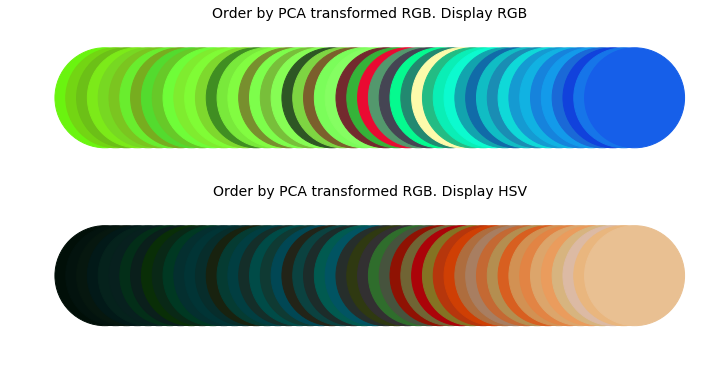

In [24]:
fig, (ax1, ax2,) = plt.subplots(2, 1, figsize=(12, 6))

c = pca.fit_transform(rgb).ravel()
idx = np.argsort(c)

ax1.scatter(np.linspace(0, 1, len(idx)), np.ones_like(idx),  c=centroids[idx], s=10000)
ax1.axis('off')
ax1.set_title('Order by PCA transformed RGB. Display RGB')

ax2.scatter(np.linspace(0, 1, len(idx)), np.ones_like(idx),  c=rgb[idx], s=10000)
ax2.axis('off')
ax2.set_title('Order by PCA transformed RGB. Display HSV')
None

## Density Based Clustering

K-Means only takes distances between neighbours into acount. This works well for concave distributions that are approximately round in shape. Below you'll find another example where k-Means fails miserably. The moons are neither round nor convex yet easily seperated into clusters by eye. A simple transformation will not help in this case.

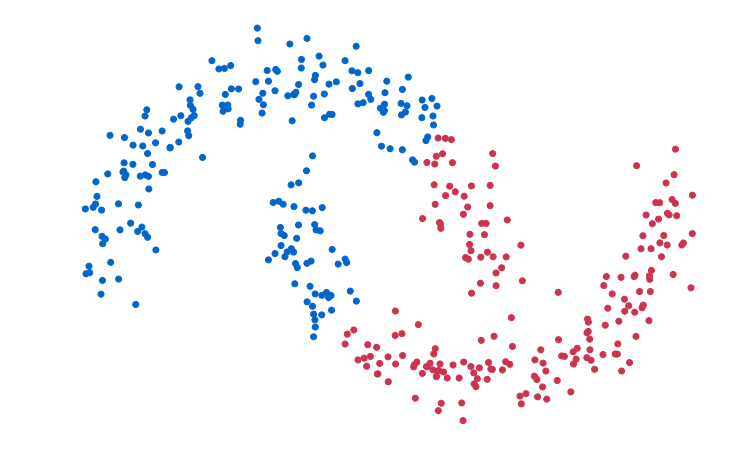

In [25]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=400, noise=0.1)
prediction = KMeans(n_clusters=2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=prediction, cmap=discrete_cmap)
plt.axis('off')
None

### DBSCAN

Density-based spatial clustering of applications with noise (DBSCAN) is a clsutering method based on the density of different regions within the parameter space. It clsuters together points within regions of high density and labels points as outliers that do not lie within a dense region.

1. Start by selecting *core points*. These are all points that have at least $m$ points in their neighbourhood region of radius $\epsilon$.

2. For each core point find connected points to build a cluster $C$. A point is connected to $C$ if its within the $\epsilon$  neighbourhood of any point in $C$ and is also a core point.

3. Assign each point which is not a core point to the nearest cluster with distance being at most $\epsilon$ 



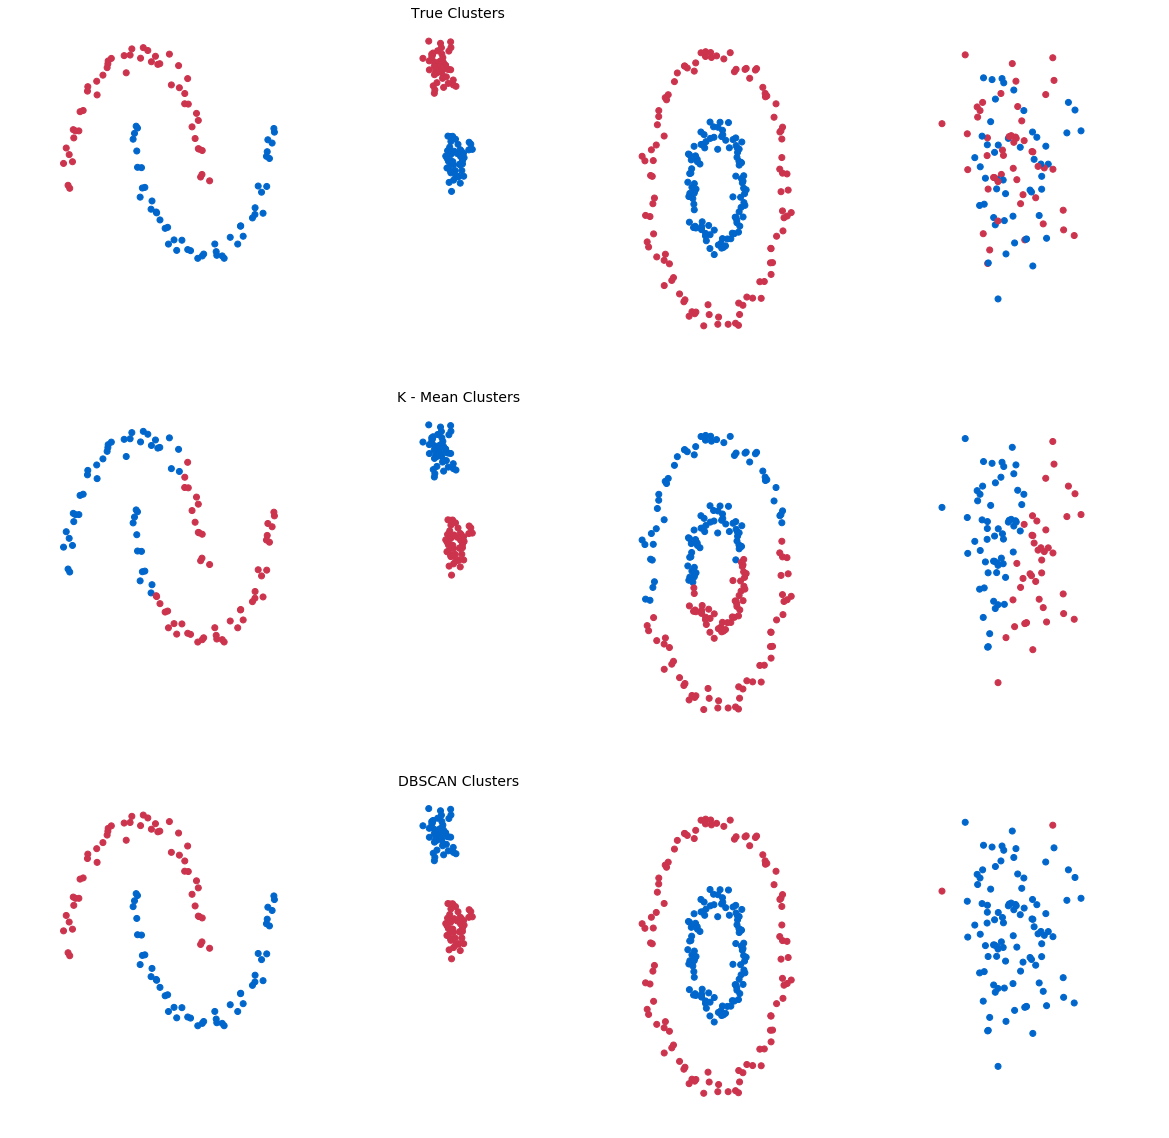

In [26]:
from sklearn.datasets import make_moons, make_checkerboard, make_circles
from sklearn.cluster import DBSCAN

f, [top, center, bottom] = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(20, 20))

X_moon, y_moon = make_moons(noise=0.05, random_state=0)
X_circle, y_circle = make_circles(noise=0.05, factor=0.4, random_state=0, n_samples=200)
X_blobs, y_blobs = make_blobs(centers=2, center_box=(-0.5, 0.5), cluster_std=0.4, random_state=0)
X_long, y_long = make_blobs(centers=2, center_box=(-2.1, 2.1), cluster_std=0.1, random_state=0)

data = [(X_moon, y_moon), (X_long, y_long), (X_circle, y_circle), (X_blobs, y_blobs)]

for ax, (X, y) in zip(top, data):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=discrete_cmap)
    ax.axis('off')
    
for ax, (X, y) in zip(center, data):
    prediction = KMeans(n_clusters=2, random_state=0).fit_predict(X)
    ax.scatter(X[:, 0], X[:, 1], c=prediction, cmap=discrete_cmap)
    ax.axis('off')
    
for ax, (X, y) in zip(bottom, data):
    prediction = DBSCAN(eps=0.339).fit_predict(X)
    ax.scatter(X[:, 0], X[:, 1], c=prediction, cmap=discrete_cmap)
    ax.axis('off')
    
top[1].set_title('True Clusters')
center[1].set_title('K - Mean Clusters')
bottom[1].set_title('DBSCAN Clusters')
None

### Evaluating Cluster Performance

In the case of unsupervised learning there is no ground truth to which the cluster structure can be compared. 

Some heuristic has to be applied measure how well a clustering performed. 

#### Silhuette Coefficent 

This evaluation ciriterion assumes a clsutering is 'good' if the clusters are dense instead of sparse. 

Define $a$ as the distance between a single point $x_0$ and all other points in the cluster $S_p$.

$$
a(x_0) = \sum_{x_i \in S_0} \left\|x_i - x_0 \right\|
$$

and $b$ as the distance between $x_0$ and all the points in the *nearest cluster* $S_p^\prime$

$$
b(x_0) = \sum_{x_i \in S_0^\prime} \left\|x_i - x_0 \right\|
$$

The Silhuette Coefficent is then defined as 

$$
s = \frac{b - a}{\text{max}(a, b)}
$$


The coefficent takes a value close to +1 for dense clustering and -1 for sparse clusters. 

Unfortunately it doesn't work very reliable.

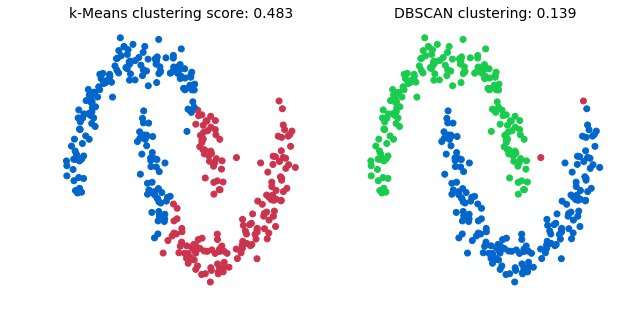

In [27]:
from sklearn.metrics import silhouette_score

X, y = make_moons(n_samples=360, noise=0.09, random_state=172)

km = KMeans(n_clusters=2)
prediction_kmeans = km.fit_predict(X)
score_kmeans = silhouette_score(X, km.labels_ ) 

db = DBSCAN(eps=0.18)
prediction_db = db.fit_predict(X)
score_db = silhouette_score(X, db.labels_ ) 

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title('k-Means clustering score: {:0.3f}'.format(score_kmeans))
ax1.scatter(X[:, 0], X[:, 1], c=prediction_kmeans, cmap=discrete_cmap)
ax1.axis('off')

ax2.set_title('DBSCAN clustering: {:0.3f}'.format(score_db))
ax2.scatter(X[:, 0], X[:, 1], c=prediction_db, cmap=discrete_cmap)
ax2.axis('off')
None

# A Complete Example

Below we load a dataset containing data observed by the FACT telescope.

<img width="45%" src="http://www.miguelclaro.com/wp/wp-content/uploads/2013/10/FACTMilkyWayVertical-4650-net.jpg" />   

We will perform the typical steps to build and evaluate a classifier.

0. Understand where your data comes from

1. Preprocessing
    
    * Drop Constant Values,
    * Handle Missing Data 
    * Feature Generation

2. Splitting
    
    * Split your data into training and evaluation sets
    
3. Training 
    
    * Train your classifier of choice.
    
4. Evaluation
    
    * Evaluate the performance on the test data set.
    * If not good enough, go back to step 1 
    
5. Physics
    
    * Check whether your data support your hypothesis
    

### 1. Get to know your data

Cherenkov telescopes record short flashes of light produced by very high energy cosmic rays and photons hitting earths atmosphere.

![](https://www.cta-observatory.org/wp-content/uploads/2016/05/cta47.png)

In [28]:
%%HTML
<video width="1000" controls>
  <source src="./resources/event.mp4" type="video/mp4">
</video>


We will use machine learning for two tasks in this example. 

 * Train a classifier to distinguish events induced by gamma rays form events induced by cosmic rays
 * Train a regressor to estimate the energy of the incoming primary particle.

### 2. Preprocess data

Load data and remove unwanted columns and store the true labels separately.


In [29]:
import pandas as pd
import fact.io as fio

In [30]:
gammas = fio.read_h5py('./resources/sample_diffuse_gammas.h5', key='events')
gammas.head()

,arrival_time_mean,arrival_time_pedestal_kurtosis,arrival_time_pedestal_max,arrival_time_pedestal_mean,arrival_time_pedestal_median,arrival_time_pedestal_min,arrival_time_pedestal_p25,arrival_time_pedestal_p75,arrival_time_pedestal_skewness,arrival_time_pedestal_variance,...,time_gradient_slope_long,time_gradient_slope_long_err,time_gradient_slope_trans,time_gradient_slope_trans_err,time_gradient_sse_long,time_gradient_sse_trans,timespread,timespread_weighted,trigger_type,width
0,50.064510,-1.109841,96.251409,50.056320,48.541463,5.000000,30.315271,70.190476,0.122054,548.930450,...,-0.028107,0.072398,0.184584,0.033308,3.345592,0.312691,0.838293,0.665250,4,4.125594
1,49.971349,-1.081534,99.000000,49.938162,49.299742,5.000000,30.720019,69.295873,0.100216,539.360854,...,-0.005743,0.039438,0.021480,0.066726,3.880951,3.818274,0.746172,0.802401,4,5.008837
2,50.364374,-1.137693,99.000000,50.406649,48.931727,5.000000,30.915493,70.418605,0.144873,558.159445,...,-0.025479,0.034733,-0.046940,0.051830,6.143687,5.922080,0.857385,0.695980,4,5.713048
3,49.754275,-1.088434,98.000000,49.789320,47.707045,6.176471,31.011719,69.293104,0.153315,539.759137,...,0.065316,0.047992,0.144199,0.099693,3.735585,3.588492,0.954412,0.912319,4,4.236660
4,49.341319,-1.133003,98.207941,49.314529,47.447368,5.000000,29.168577,69.760411,0.154019,560.212447,...,-0.004945,0.109799,0.277320,0.135065,124.030428,84.484591,3.358279,2.771534,4,6.694258


Now delete all simulated values which can not be observed during measurement in the physical world. We know which columns to remove because they have a special prefix.

In [31]:
forbidden_columns = 'ceres_|mc_|corsika_|run_|source_position_|pointing_|aux_|event_num|incident_angle'

gammas = gammas.filter(regex=f'^(?!{forbidden_columns}).*$')

Check the data types of the columns. We can select non-numeric types and encode them. But in this case we might as well drop them as the attribute is not important.

In [32]:
c = gammas.select_dtypes(exclude=['number']).columns
print(c)

gammas = gammas.drop(c, axis='columns')

Index(['runtype'], dtype='object')


We can spot the columns with constant values by looking at the standard deviation.

In [33]:
desc = gammas.describe()
desc

,arrival_time_mean,arrival_time_pedestal_kurtosis,arrival_time_pedestal_max,arrival_time_pedestal_mean,arrival_time_pedestal_median,arrival_time_pedestal_min,arrival_time_pedestal_p25,arrival_time_pedestal_p75,arrival_time_pedestal_skewness,arrival_time_pedestal_variance,...,time_gradient_slope_long,time_gradient_slope_long_err,time_gradient_slope_trans,time_gradient_slope_trans_err,time_gradient_sse_long,time_gradient_sse_trans,timespread,timespread_weighted,trigger_type,width
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000
mean,49.740845,-1.107692,98.158977,49.692055,48.330204,5.307559,30.020772,69.424309,0.133096,548.057209,...,0.001122,0.036415,0.001657,0.071118,32.358447,66.361993,1.443372,1.273125,4.0,6.504231
std,0.765677,0.040427,1.005108,0.716279,1.431498,0.548090,0.874680,1.047815,0.049005,15.018965,...,0.068504,0.034970,0.100130,0.061352,56.183769,344.951531,0.817965,0.740511,0.0,1.755483
min,47.316001,-1.243104,93.349208,47.214079,43.322581,5.000000,27.301295,64.951463,-0.581203,415.789354,...,-0.491409,0.000947,-0.790551,0.002228,0.028250,0.027688,0.126072,0.131271,4.0,2.064943
25%,49.241067,-1.134921,98.000000,49.213705,47.389812,5.000000,29.446465,68.744228,0.105003,538.245430,...,-0.033493,0.014003,-0.041412,0.033228,6.641634,7.048601,0.928098,0.828031,4.0,5.223795
50%,49.706151,-1.108912,98.096233,49.670036,48.239820,5.000000,30.000000,69.440536,0.135656,548.349986,...,0.001012,0.026125,0.002579,0.053872,15.690777,17.889471,1.243882,1.093557,4.0,6.296922
75%,50.178076,-1.083242,99.000000,50.132883,49.119444,5.657365,30.563001,70.112576,0.164701,557.925766,...,0.034840,0.046479,0.043885,0.088357,37.561407,45.605035,1.728471,1.499146,4.0,7.616817
max,58.051201,-0.447461,99.000000,56.457241,62.848495,9.495327,41.384591,75.595801,0.304277,602.391789,...,1.187848,0.387313,0.853158,1.387731,1944.673229,13904.011576,13.357574,13.135994,4.0,28.411963


In [34]:
c = desc.columns[desc.loc['std'] == 0]
print(c)
gammas = gammas.drop(c, axis='columns')

Index(['num_pixel', 'roi', 'trigger_type'], dtype='object')


Check for missing data. (Just delete it in this case)

In [35]:
gammas = gammas.dropna()

So far we only loaded simulated gamma-ray showers. Now we do the same for the cosmic ray events. We create a method to perform all preprocessing in one step. We need this several times.

In [36]:
def preprocess(df):
    df = df.filter(regex=f'^(?!{forbidden_columns}).*$')
    c = df.select_dtypes(exclude=['number']).columns
    df = df.drop(c, axis='columns')
    desc = df.describe()
    c = desc.columns[desc.loc['std'] == 0]
    df = df.drop(c, axis='columns')
    df = df.dropna()
    return df

In [37]:
protons = fio.read_h5py('./resources/sample_proton.h5', key='events')
protons = preprocess(protons)

Now we can perform feature generation. We use our expert knowledge or intuition to create a new feature by combining existing columns into a new variable.

In [38]:
def feature_generation(df):
    df['awesome_feature'] = (df.length/df.width) * df.size
    return df

gammas = feature_generation(gammas)
protons = feature_generation(protons)

A quick look at the data so far

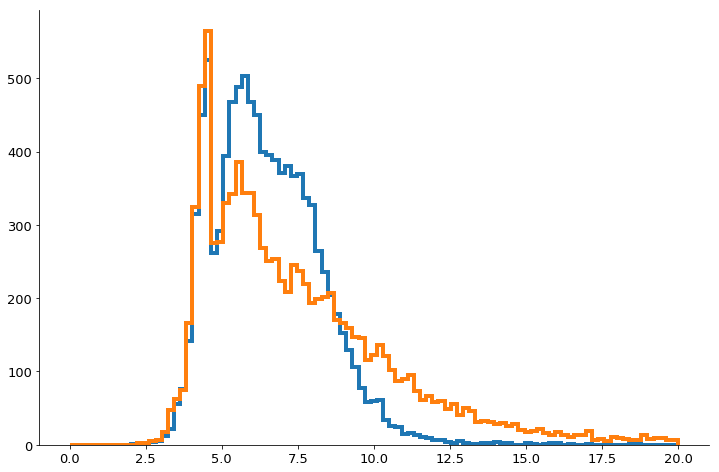

In [39]:
bins = np.linspace(0, 20, 100)
plt.hist(gammas.width, bins=bins, histtype='step', lw=4)
plt.hist(protons.width, bins=bins, histtype='step', lw=4)
None

At this point we combine the two datasets into one big matrix and build a label vector $y$

In [40]:
y = np.concatenate([np.ones(len(gammas)), np.zeros(len(protons))])
X = pd.concat([gammas, protons])

### 3. Split Data

Now we can split the data into test and training sets. Scikit-Learn provides some neat methods to do just that.

In [41]:
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X, y)

### 4. Train the classifier

Now we can train any classifier we want on the prepared data.

In [72]:
from sklearn.tree import DecisionTreeClassifier

rf = DecisionTreeClassifier( max_depth=10, criterion='entropy')
rf.fit(X_train, y_train)

y_prediction = rf.predict(X_test)
y_prediction_proba = rf.predict_proba(X_test)

### 5. Evaluation 

Check accuracy of the models and other metrics 

In [73]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

acc = accuracy_score(y_test, y_prediction)
auc = roc_auc_score(y_test, y_prediction_proba[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, y_prediction_proba[:, 1])

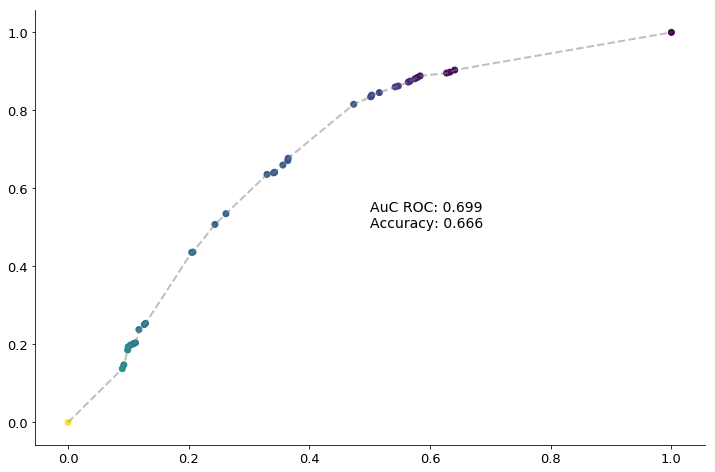

In [76]:
plt.scatter(fpr, tpr, c=thresholds)
plt.plot(fpr, tpr, '--', color='gray', alpha=0.5)
plt.text(0.5, 0.5, f'AuC ROC: {auc:0.03f} \nAccuracy: {acc:0.03f}')
None

Perform steps 3, 4, and 5 in one step using cross validation

In [47]:
from sklearn.model_selection import cross_validate

rf = DecisionTreeClassifier(max_depth=12, criterion='entropy')

scoring = {'acc': 'accuracy',
           'auc': 'roc_auc',
           'recall': 'recall'}

results = cross_validate(rf, X, y, cv=5, scoring=scoring, return_train_score=True)
results

{'fit_time': array([4.97087836, 4.80360222, 4.79491305, 5.05465293, 4.85183692]),
 'score_time': array([0.0291357 , 0.01756597, 0.01736093, 0.01739311, 0.01824117]),
 'test_acc': array([0.67075, 0.66525, 0.65725, 0.661  , 0.657  ]),
 'test_auc': array([0.71137775, 0.70358625, 0.69402112, 0.705262  , 0.6956065 ]),
 'test_recall': array([0.798 , 0.755 , 0.7285, 0.7275, 0.764 ]),
 'train_acc': array([0.7936875, 0.808125 , 0.808875 , 0.7963125, 0.808875 ]),
 'train_auc': array([0.8850172 , 0.90514311, 0.90272809, 0.89702347, 0.90512045]),
 'train_recall': array([0.916625, 0.897375, 0.889375, 0.86225 , 0.912125])}

In [68]:
from IPython.display import Latex, display
auc = results['test_auc']
recall = results['test_recall']
acc = results['test_acc']

s = f'Area under RoC curve:  ${auc.mean():0.04f} \\pm {auc.std():0.04f}$'
display(Latex(s))
s = f' Accuracy:  ${acc.mean():0.04f} \\pm {acc.std():0.04f}$'
display(Latex(s))
s = f' Recall:  ${recall.mean():0.04f} \\pm {recall.std():0.04f}$'
display(Latex(s))



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### 6. Physics

Now we could test our model and our hypothesis on real observed data. This part of the analysis is the most time 
consuming in general. It also requires more data than than this notebook can handle. 
After careful analysis one can produce an image of the gamma-ray sky

<img width="60%" src="https://www.mpi-hd.mpg.de/hfm/HESS/hgps/figures/HESS_J1813m126.png">

### Improving Classification


#### Boosting and AdaBoost

Similar to the idea of combining many classifiers through bagging (like we did for the RandomForests) we now 
train many estimators in a sequential manner. In each iteration the data gets modified slightly using weights $w$
for each sample in the training data. In the first iteration the weights are all set to $w=1$

In each successive iteration the weights are updated. The samples that were incorrectly classified in the previous 
iteration get a higher weight. The weights for correctly classified samples get decreases. 
In other words: We increase the influence/importance of samples that are difficult to classify.

Predictions are performed by taking a weighted average of the single predictors.

The popular AdaBoost algorithms takes this a step further by optimizing the weight of each separate classifier 
in the ensemble.
The AdaBoost ensemble combines many learners in an iterative way. The learner at iteration $m$ is:

$$
 F_{m}(x)=F_{m-1}(x)+\gamma _{m}h_{m}(x)
$$

The choice of $F_0$ is problem specific.

Each weak learner produces a prediction $h(x_{m})$ for each sample in the training set. At each iteration $m$ a 
weak learner is fitted and assigned a coefficient $\gamma_{m}$ which is found by minimizing:

$$
\gamma_m = {\underset {\gamma }{\arg \min }} \sum_{i}^{N}E\bigl(F_{m-1}(x_{i})+\gamma h(x_{i})\bigr)
$$

where $E(F)$ is some error function and $x_i$ is the reweighted data sample.

In general this method can work with any classifying method. Traditionally it is being used with very small 
decision trees. 
The weights get used to select the split points during the minimization of the loss function in each node

$$
 \underset{(X, s) \in \, \mathbf{X} \times {S}}{\arg \max} IG(X,Y) =   \underset{(X, s) \in \, \mathbf{X} \times {S}}{\arg \max} ( H(Y) - H(Y |\, X) ).
$$

Below we try AdaBoost on the FACT data.


In [125]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, algorithm='SAMME')
ada.fit(X_train, y_train)

y_prediction = ada.predict(X_test)
y_prediction_proba = ada.predict_proba(X_test)

Text(0.5, 0, 'Iteration')

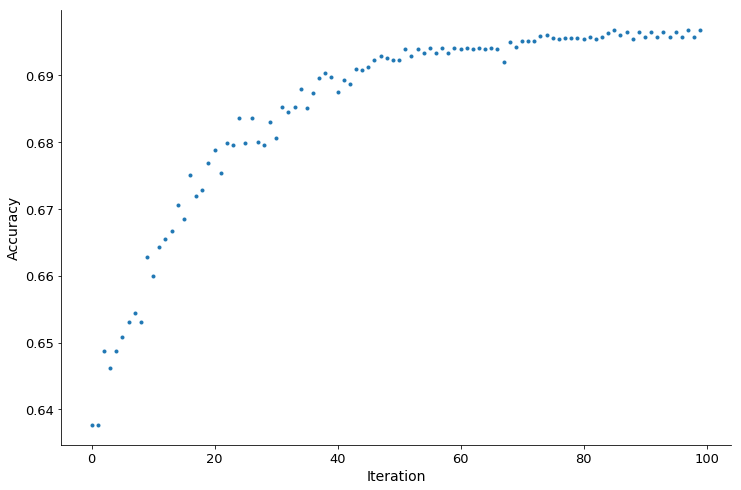

In [126]:
plt.plot(range(100), list(ada.staged_score(X_test, y_test)), '.')
plt.ylabel('Accuracy')
plt.xlabel('Iteration')

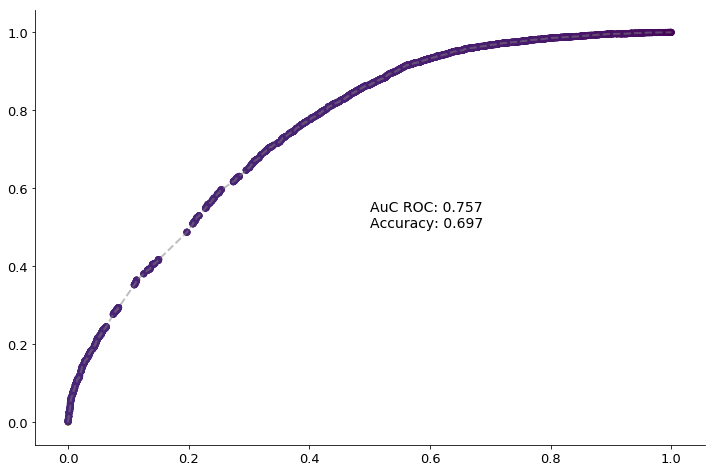

In [127]:
acc = accuracy_score(y_test, y_prediction)
auc = roc_auc_score(y_test, y_prediction_proba[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, y_prediction_proba[:, 1])

plt.scatter(fpr, tpr, c=thresholds)
plt.plot(fpr, tpr, '--', color='gray', alpha=0.5)
plt.text(0.5, 0.5, f'AuC ROC: {auc:0.03f} \nAccuracy: {acc:0.03f}')
None

#### Gradient Boosting 

Very similar to AdaBoost. Only this time we change the target label we train the classifiers for.

Formulate the general problem as follows (See Wikipedia):

Start with a constant function $F_{0}(x)$ and some differentiable loss function $L$ and incrementally expands it in a greedy fashion:

$$
F_{0}(x)={\underset {\gamma }{\arg \min }}{\sum _{i=1}^{n}{L(y_{i},\gamma )}}
$$

$$
F_{m}(x)=F_{m-1}(x)+{\underset {h_{m}\in {\mathcal {H}}}{\operatorname {arg\,min} }}\left[{\sum _{i=1}^{n}{L(y_{i},F_{m-1}(x_{i})+h_{m}(x_{i}))}}\right]
$$

Finding the best $ h_{m}\in {\mathcal {H}}$ is computationally speaking impossible.
If we could find the perfect $h$ however, we know that 

$$
F_{m+1}(x_i)=F_{m}(x_i)+h(x_i)=y_i
$$

or, equivalently, 

$$
   h(x_i)= y_i - F_{m}(x_i)
$$

Note that for the mean squared error loss $\frac{1}{2}(y_i - F(x_i))^2$ this is equivalent to the negative 
gradient with respect to $F_i$.

For a general loss function we fit $h_{m}(x)$ to the residuals, or negative gradients 
$$
 r_{i, m}=-\left[{\frac {\partial L(y_{i},F(x_{i}))}{\partial F(x_{i})}}\right]_{F(x)=F_{m-1}(x)}\quad {\mbox{for }}i=1,\ldots ,n.
$$



Below we try it on FACT data again.


In [139]:
from sklearn.ensemble import GradientBoostingClassifier

grb = GradientBoostingClassifier(verbose=True, n_estimators=100)
grb.fit(X_train, y_train)

y_prediction = grb.predict(X_test)
y_prediction_proba = grb.predict_proba(X_test)

      Iter       Train Loss   Remaining Time 
         1           1.3552            8.59s
         2           1.3290            8.85s
         3           1.3048            8.80s
         4           1.2837            8.56s
         5           1.2635            8.47s
         6           1.2447            8.46s
         7           1.2295            8.32s
         8           1.2130            8.23s
         9           1.2003            8.27s
        10           1.1878            8.28s
        20           1.0992            7.36s
        30           1.0461            6.49s
        40           1.0069            5.57s
        50           0.9810            4.56s
        60           0.9566            3.62s
        70           0.9376            2.67s
        80           0.9197            1.78s
        90           0.9025            0.88s
       100           0.8865            0.00s


Text(0.5, 0, 'Iteration')

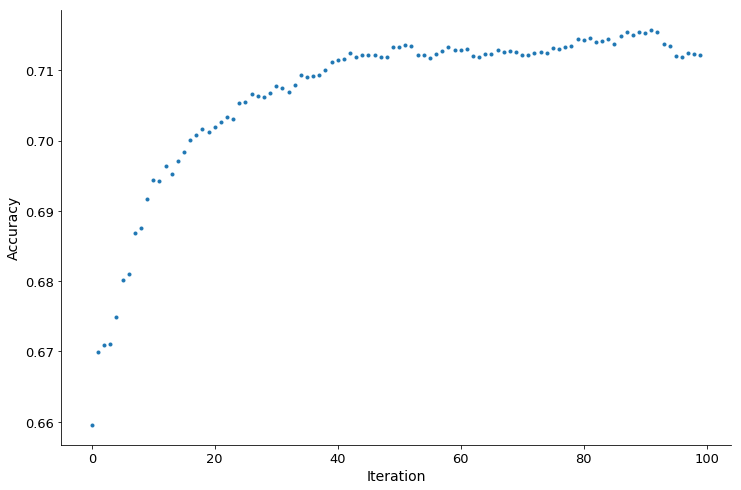

In [140]:
l = [accuracy_score(y_pred, y_test) for y_pred in grb.staged_predict(X_test)]

plt.plot(range(len(l)), l, '.')
plt.ylabel('Accuracy')
plt.xlabel('Iteration')

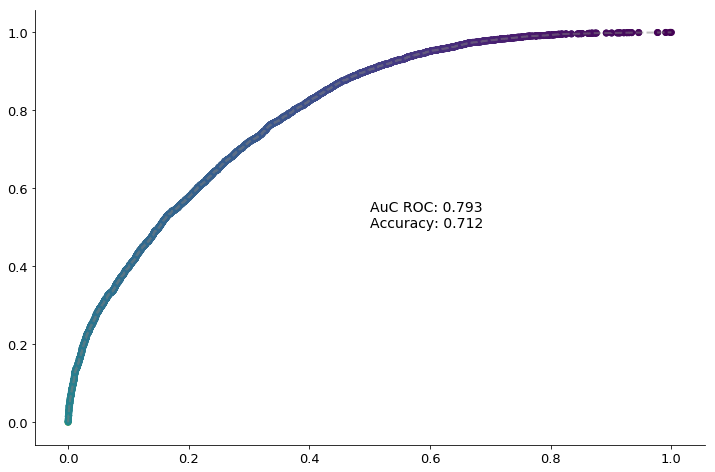

In [141]:
acc = accuracy_score(y_test, y_prediction)
auc = roc_auc_score(y_test, y_prediction_proba[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, y_prediction_proba[:, 1])

plt.scatter(fpr, tpr, c=thresholds)
plt.plot(fpr, tpr, '--', color='gray', alpha=0.5)
plt.text(0.5, 0.5, f'AuC ROC: {auc:0.03f} \nAccuracy: {acc:0.03f}')
None

More on gradient descent algorithms can be found in the Neural Network notebook.

Let's now test our all time favorite classifier. 

In [144]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150,  max_depth=18, criterion='entropy')
rf.fit(X_train, y_train)

y_prediction = rf.predict(X_test)
y_prediction_proba = rf.predict_proba(X_test)

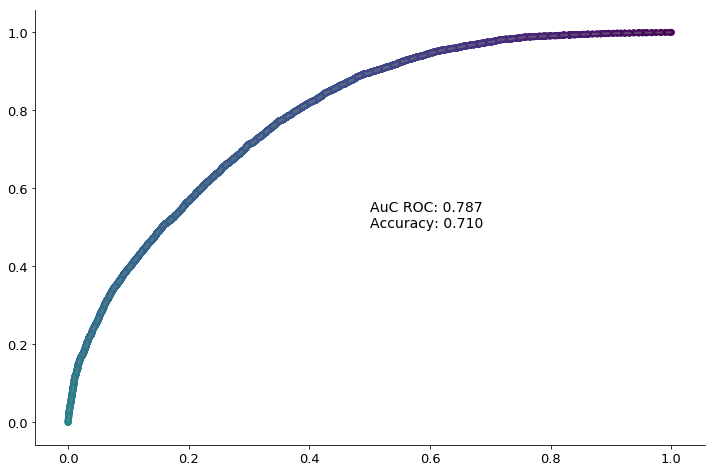

In [145]:
acc = accuracy_score(y_test, y_prediction)
auc = roc_auc_score(y_test, y_prediction_proba[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, y_prediction_proba[:, 1])

plt.scatter(fpr, tpr, c=thresholds)
plt.plot(fpr, tpr, '--', color='gray', alpha=0.5)
plt.text(0.5, 0.5, f'AuC ROC: {auc:0.03f} \nAccuracy: {acc:0.03f}')
None